In [16]:
import pandas as pd
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Figure size 640x480 with 0 Axes>

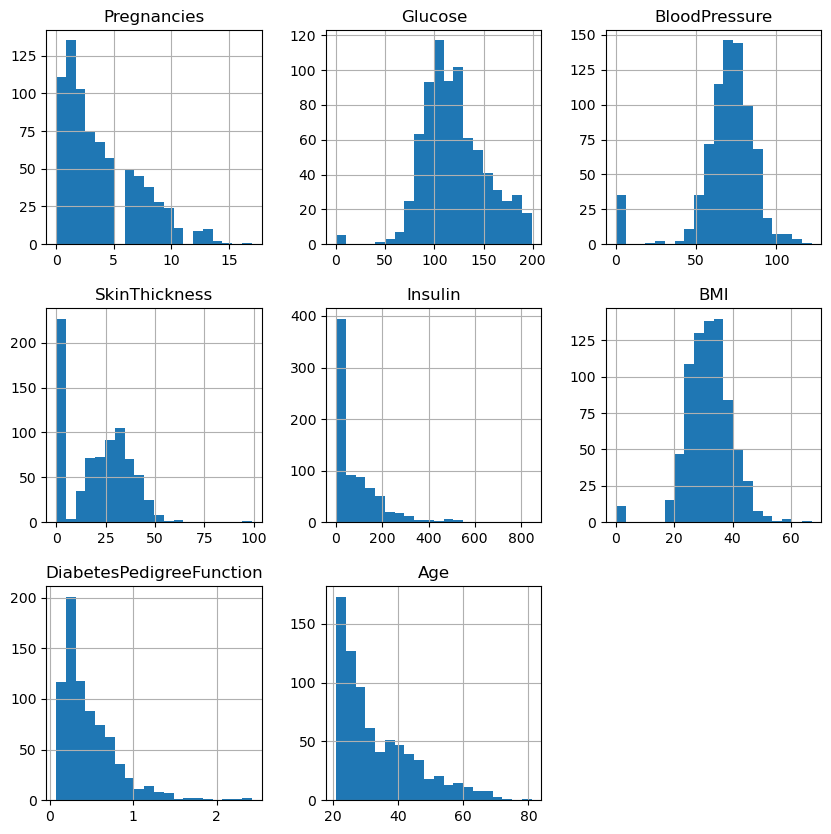

In [19]:
import matplotlib.pyplot as plt
plt.figure()
df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]].hist(bins=20,figsize=(10,10))
plt.show()

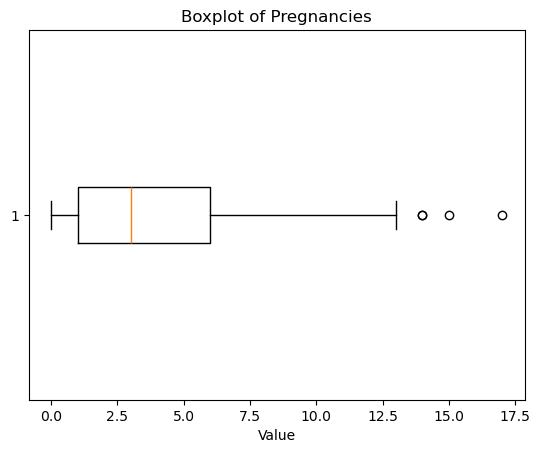

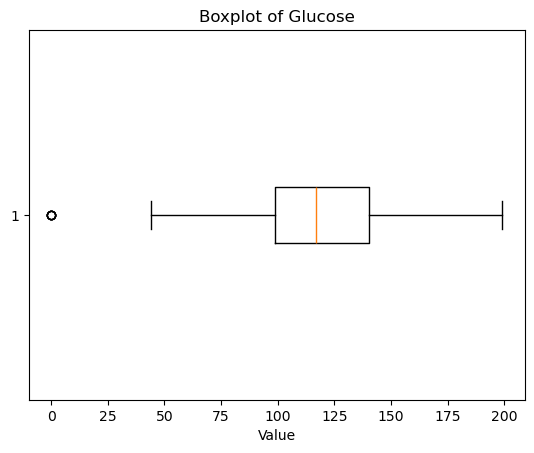

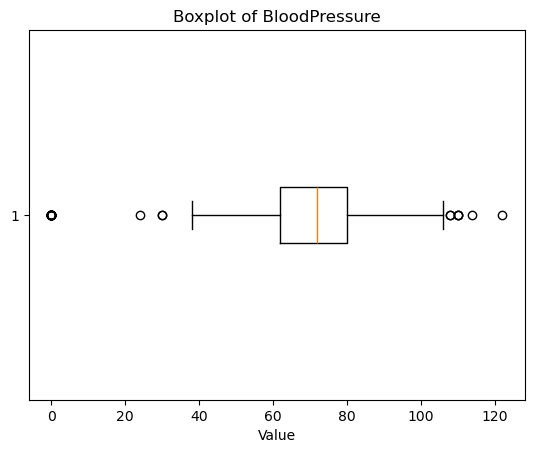

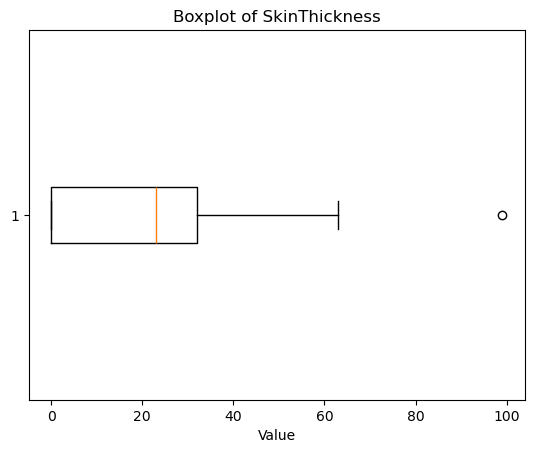

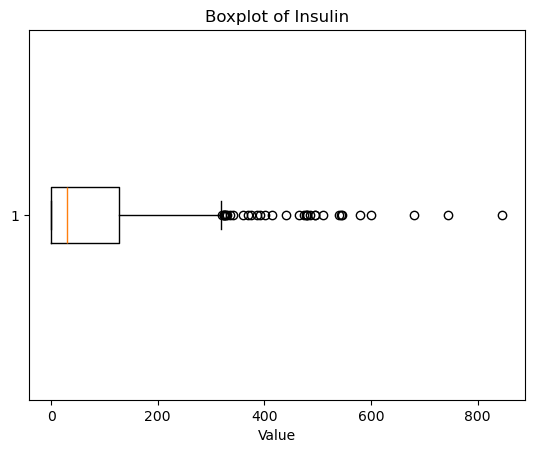

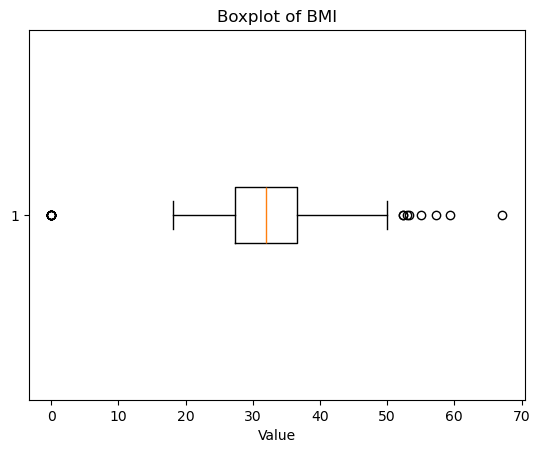

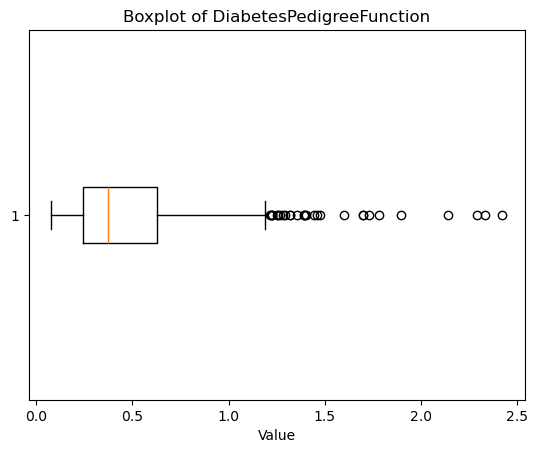

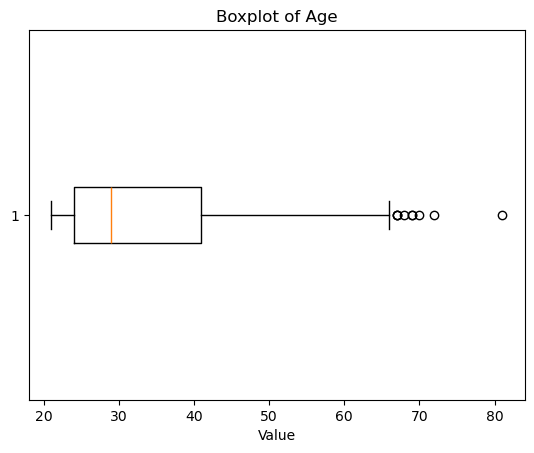

In [20]:
feature_cols = df.columns.drop(["Outcome"])

for col in feature_cols:
    plt.figure()
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel("Value")
    plt.show

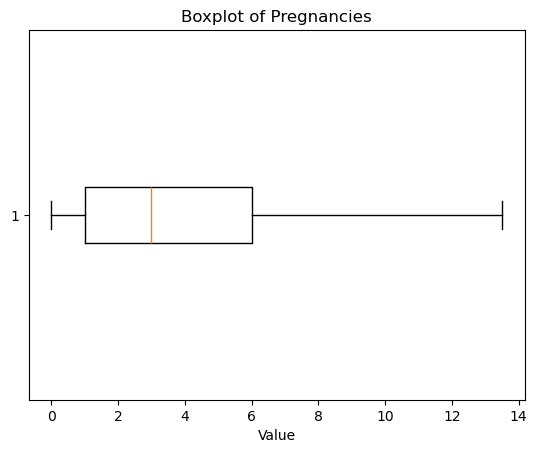

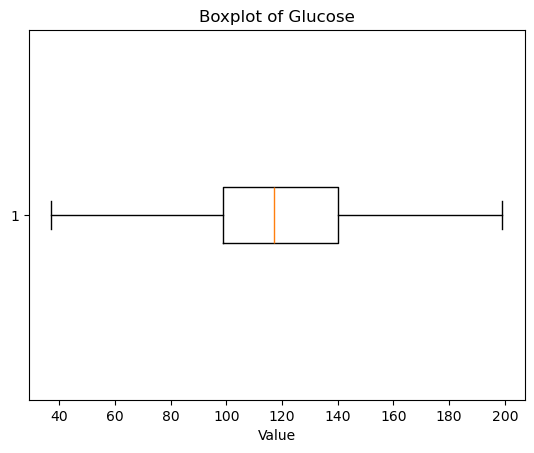

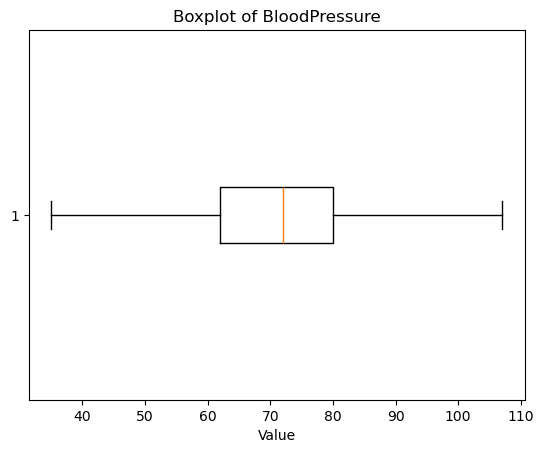

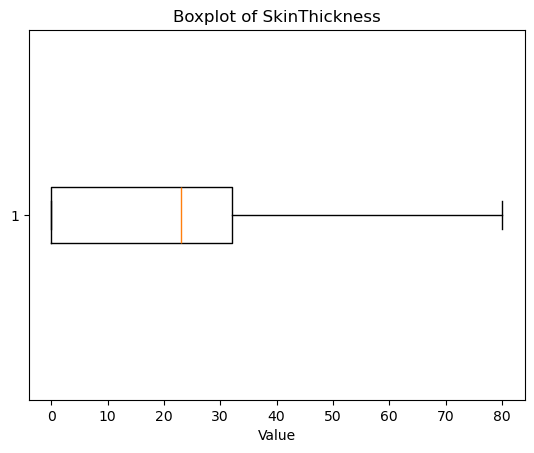

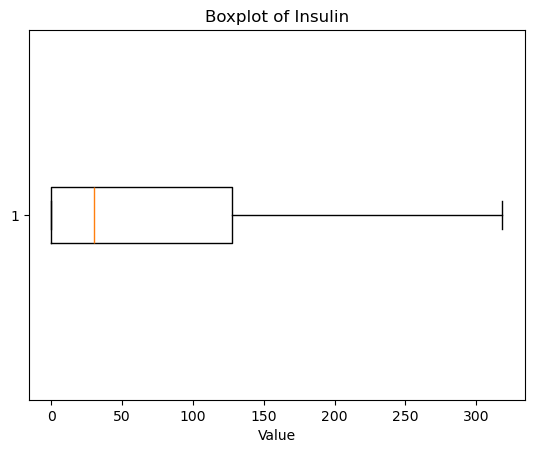

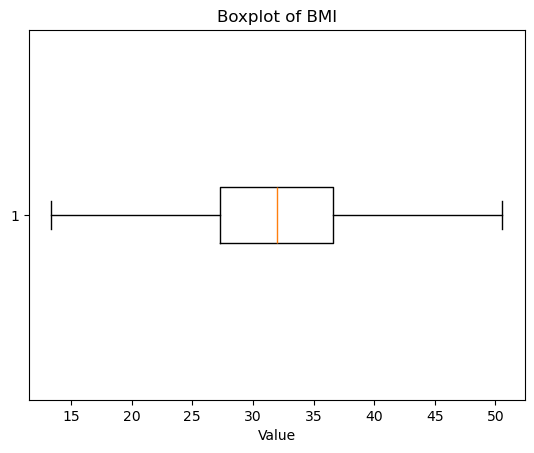

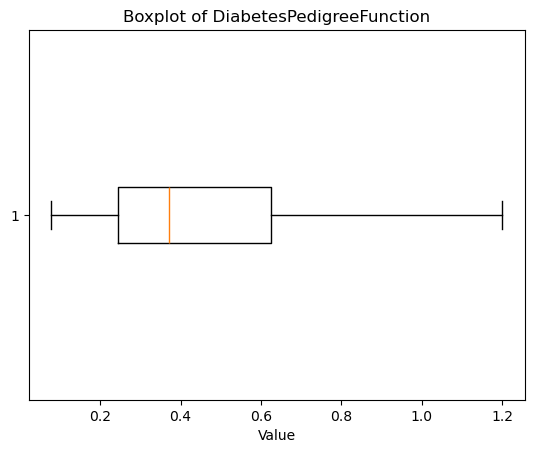

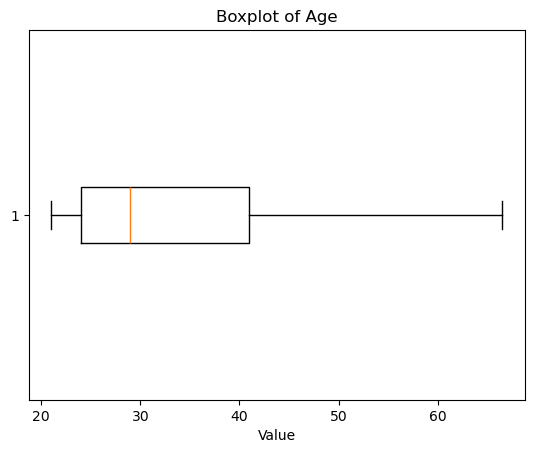

In [21]:
for col in feature_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR
    UW = Q3 + 1.5 * IQR
    df[col] = df[col].clip(LW, UW)

for col in feature_cols:
    plt.figure()
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel("Value")
    plt.show

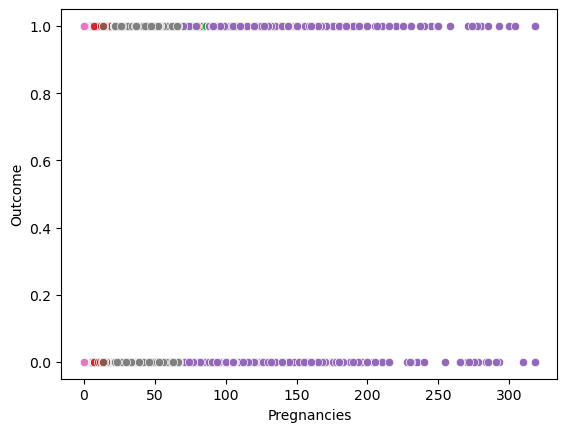

In [22]:
import seaborn as sns
for col in feature_cols:
    sns.scatterplot(x=col, y="Outcome", data=df)

In [23]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128987,0.184307,-0.084349,-0.077793,0.024681,-0.017398,0.549695,0.220392
Glucose,0.128987,1.000000,0.197865,0.059806,0.315856,0.235542,0.120213,0.269056,0.479158
BloodPressure,0.184307,0.197865,1.000000,0.152644,0.050080,0.282544,0.038793,0.304208,0.113301
SkinThickness,-0.084349,0.059806,0.152644,1.000000,0.488101,0.401494,0.177920,-0.119170,0.073125
Insulin,-0.077793,0.315856,0.050080,0.488101,1.000000,0.209665,0.190087,-0.065547,0.124721
BMI,0.024681,0.235542,0.282544,0.401494,0.209665,1.000000,0.141087,0.043375,0.309739
DiabetesPedigreeFunction,-0.017398,0.120213,0.038793,0.177920,0.190087,0.141087,1.000000,0.047289,0.184969
Age,0.549695,0.269056,0.304208,-0.119170,-0.065547,0.043375,0.047289,1.000000,0.242702
Outcome,0.220392,0.479158,0.113301,0.073125,0.124721,0.309739,0.184969,0.242702,1.000000


In [24]:
from sklearn.model_selection import train_test_split

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7532467532467533
Confusion Matrix:
 [[80 19]
 [19 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



ROC-AUC: 0.814141414141414


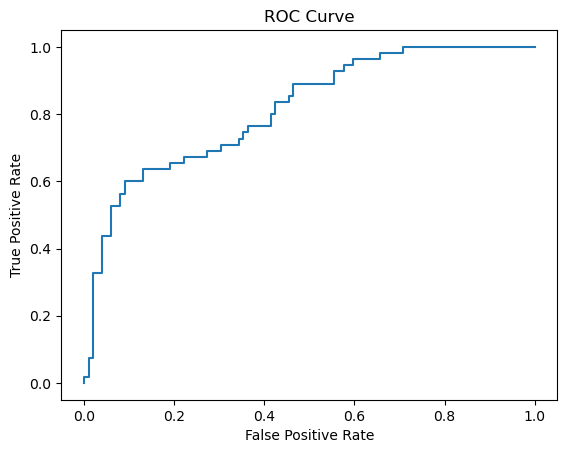

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", auc)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [27]:
import pandas as pd

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})
print(coef_df)

                    Feature  Coefficient
0               Pregnancies     0.059993
1                   Glucose     0.035522
2             BloodPressure    -0.018274
3             SkinThickness     0.002732
4                   Insulin    -0.002427
5                       BMI     0.112519
6  DiabetesPedigreeFunction     0.888171
7                       Age     0.039184


In [28]:
""" 
The logistic regression coefficients indicate the direction and 
strength of the relationship between each feature and the probability of diabetes.
Positive coefficients (e.g., Glucose, BMI, DiabetesPedigreeFunction) 
increase the likelihood of diabetes, while negative coefficients decrease it. 
Among all features, Glucose and BMI show strong positive influence, 
suggesting that higher glucose levels and body mass index significantly increase diabetes risk.
"""

' \nThe logistic regression coefficients indicate the direction and \nstrength of the relationship between each feature and the probability of diabetes.\nPositive coefficients (e.g., Glucose, BMI, DiabetesPedigreeFunction) \nincrease the likelihood of diabetes, while negative coefficients decrease it. \nAmong all features, Glucose and BMI show strong positive influence, \nsuggesting that higher glucose levels and body mass index significantly increase diabetes risk.\n'

In [29]:
import pickle
pickle.dump(model, open("diabetes_model.pkl","wb"))